In [1]:
from sympy import *
import math
import numpy as np
from pylab import *
import matplotlib.pyplot as plt 

In [9]:
def F(x,y):
    return x + y
def G(x):
   return 2*math.exp(x)-x-1
x0 = 0
y0 = 1
X = 0.8
h = 0.2
S = 3
eps = 1e-5

In [3]:
def Giaithua(n):
  res = 1
  if n>1:
    for i in range (1,n+1):
      res *= i
  return res

Tích phân ngoại suy 

In [4]:
def Tinhtp1(S):
  a = np.zeros(S,dtype= float)
  b = np.zeros(S,dtype= float)
  a[0] = 0
  a[1] = 1
  kq = 0
  for x in range(0,S):
   if(x > 1):
    for j in range(x,0,-1):
       a[j] = a[j-1] + a[j]*(x-1)
    a[0] = 0
   for i in range(x+1):
    kq = kq + a[i]/(i+1)
   kq = kq/Giaithua(x)
   if(x == 0):
     b[x] = 1
   else:
     b[x] = kq
   kq = 0
  return b
print(Tinhtp1(S))

[1.         0.5        0.41666667 0.375     ]


Tích phân nội suy

In [5]:
def Tinhtp2(S):
  a = np.zeros(S,dtype= float)
  b = np.zeros(S,dtype= float)
  a[0] = -1
  a[1] = 1
  kq = 0
  for x in range(0,S):
   if(x > 1):
    for j in range(x,0,-1):
       a[j] = a[j-1] + a[j]*(x-2)
    a[0] = 0
   for i in range(x+1):
    kq = kq + a[i]/(i+1)
   kq = kq/Giaithua(x)
   if(x == 0):
     b[x] = 1
   else:
     b[x] = kq
   kq = 0
  return b
print(Tinhtp2(S))

[ 1.         -0.5        -0.08333333 -0.04166667]


In [6]:
def pascal(n):
  pas = np.zeros((n,n), dtype= float)
  for i in range(n):
    pas[i][0] = 1
    for j in range(1,i+1):
      pas[i][j]=pas[i-1][j-1]*(-1)+pas[i-1][j]
  return pas

In [10]:
def AB_AM(x0,y0,X,S,h,eps):
  n = int((X-x0)/h)
  x = np.zeros(n+1, dtype= float)
  y = np.zeros(n+1, dtype=float)
  a1 = np.zeros(100, dtype= float)
  b1 = np.zeros(S, dtype= float)
  a2 = np.zeros(100, dtype= float)
  b2 = np.zeros(S, dtype= float)
  q = np.zeros(100, dtype= float)
  pas = np.zeros((100,100), dtype= float)
  ss = np.zeros(n+1, dtype=float)
  g = np.zeros(n+1, dtype=float)
  pas = pascal(S)
  y[0] = y0
  for i in range(n+1):
    x[i] = x0 + i*h

  for i in range(1,S):
    K1 = h*F(x[i-1], y[i-1])
    K2 = h*F(x[i-1] + h/2, y[i-1] + K1/2)
    K3 = h*F(x[i-1] + h/2, y[i-1] + K2/2)
    K4 = h*F(x[i-1] + h, y[i-1] + K3)

    y[i] = y[i-1] + (1/6)*(K1 + 2*K2 + 2*K3 + K4)
    K1 = 0
    K2 = 0
    K3 = 0
    K4 = 0
 
  #Tính hệ số ngoại suy
  a1 = Tinhtp1(S)
  for i in range(S):
    b1[i] = 0
    for j in range(S):
      b1[i]=b1[i]+a1[j]*pas[j][i]
  print("Ma trận hệ số ngoại suy là: \n",b1)

  #Tính hệ số nội suy
  a2 = Tinhtp2(S)
  for i in range(S):
    b2[i] = 0
    for j in range(S):
      b2[i]=b2[i]+a2[j]*pas[j][i]
  print("\nMa trận hệ số nội suy là: \n",b2)
  
  for i in range(S,n+1):
    #Dùng ngoại suy dự đoán
    T = y[i-1]
    for j in range(S):
      T = T + (h*b1[j] * F(x[i-j-1],y[i-j-1]))
    
    #Dùng nội suy hiệu chỉnh 
    delta = 0
    for k in range(1,S):
        delta = delta + h*b2[k]*F(x[i-k],y[i-k])
    y[i] = y[i-1] + h * b2[0] * F(x[i],T) + delta
    # q[i]=1
    ym=y[i-1]+h*b2[0]*F(x[i],y[i]) + delta 
    while ( math.fabs(ym-y[i]) >= eps) :
      y[i]=ym
      ym=y[i-1]+h*b2[0]*F(x[i],y[i]) + delta
      q[i] = q[i] + 1
    y[i]=ym

  print(" \n   x               y                q                g(x)         ss   \n")
  for i in range(n+1):
    g[i] = G(x[i])
    ss[i] = math.fabs(g[i] - y[i])
    print("%-15.9f   %-15.9f    %d \n"%(x[i],y[i],q[i]))
  
  plt.figure(figsize=(12,7))
  plt.plot(x,y,'g',label = 'Y')
  #plt.plot(x,G(x),'r',label = 'G')
  #plt.plot(x,ss,'y',label = 'Saiso')
  plt.legend()
  plt.show()

Ma trận hệ số ngoại suy là: 
 [ 1.91666667 -1.33333333  0.41666667]

Ma trận hệ số nội suy là: 
 [ 0.41666667  0.66666667 -0.08333333]
 
   x               y                q                g(x)         ss   

0.000000000       1.000000000        0 

0.200000000       1.242800000        0 

0.400000000       1.583635920        0 

0.600000000       2.044444322        2 

0.800000000       2.651610403        2 



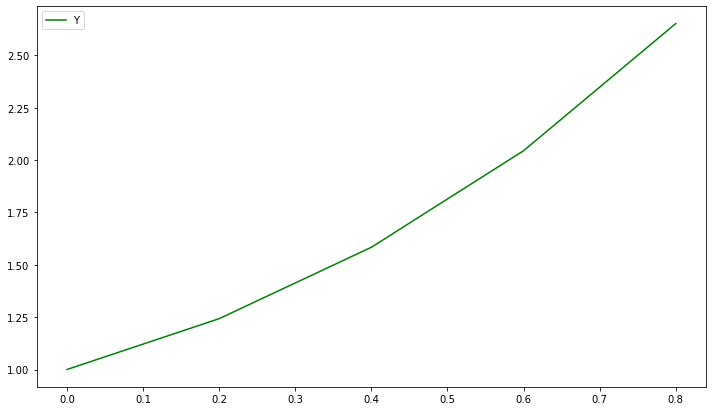

In [11]:
AB_AM(x0,y0,X,S,h,eps)